In [1]:
import svm
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools

In [3]:
num_samples=50
num_features=2
grid_size=100
samples = np.matrix(np.random.normal(size=num_samples * num_features)
                    .reshape(num_samples, num_features))
labels = 2 * (samples.sum(axis=1) > 0) - 1.0

In [4]:
print type(labels)
labels.shape

<class 'numpy.matrixlib.defmatrix.matrix'>


(50, 1)

In [5]:
clf = svm.SVM(C = 0.1)

In [6]:
clf.fit(samples, labels) 

<type 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0: -9.1558e+00 -8.9357e+00  2e+02  2e+01  8e-16
 1: -1.7246e+00 -8.3380e+00  1e+01  5e-01  8e-16
 2: -1.4112e+00 -3.2010e+00  2e+00  2e-16  5e-16
 3: -1.7679e+00 -2.0394e+00  3e-01  1e-16  5e-16
 4: -1.8762e+00 -1.9429e+00  7e-02  1e-16  4e-16
 5: -1.9070e+00 -1.9097e+00  3e-03  2e-16  4e-16
 6: -1.9085e+00 -1.9085e+00  3e-05  1e-16  4e-16
 7: -1.9085e+00 -1.9085e+00  3e-07  1e-16  5e-16
Optimal solution found.


<svm.SVM instance at 0x7f4896547b00>

In [7]:
def plot(predictor, X, y, grid_size):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_size),
                         np.linspace(y_min, y_max, grid_size),
                         indexing='ij')
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))
        
    
    Z = np.array(result).reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 cmap=cm.Paired,
                 levels=[-0.001, 0.001],
                 extend='both',
                 alpha=0.8)
    plt.scatter(flatten(X[:, 0]), flatten(X[:, 1]),
                c=flatten(y), cmap=cm.Paired)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

In [8]:
predictor = clf

/home/asus/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


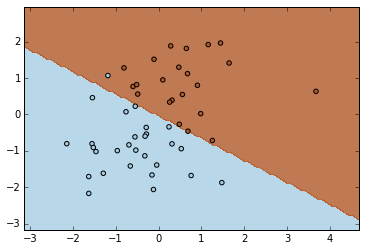

In [9]:
plot(predictor, samples, labels, grid_size)

In [10]:
import pandas as pd
path=""
X_train =pd.read_csv(path+"Xtr.csv", header=None)
Y =pd.read_csv(path+"Ytr.csv")
X_test =pd.read_csv(path+"Xte.csv", header=None)

y_train = Y["Prediction"].values
X_train = X_train.values
X_test = X_test.values

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel = 'rbf', degree = 3, n_components= 35, gamma= 0.01)

X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [11]:
def min_kernel(a, b):
    return np.sum(np.minimum(a,b))

In [12]:
from multiclasssvm import multiclass_svm
svm = multiclass_svm(min_kernel,0.1)

In [ ]:
classifiers = svm.fit(X_train,y_train)

<type 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0: -2.5740e+02 -1.7378e+02  4e+03  2e+01  7e-16
 1: -3.9783e+01 -1.6024e+02  2e+02  2e-01  9e-16
 2: -4.3138e+01 -5.1345e+01  9e+00  9e-03  7e-16
 3: -4.6764e+01 -4.6852e+01  1e-01  9e-05  5e-16
 4: -4.6800e+01 -4.6801e+01  1e-03  9e-07  3e-16
 5: -4.6800e+01 -4.6800e+01  1e-05  9e-09  2e-16
Optimal solution found.
<type 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0: -2.5740e+02 -1.7074e+02  4e+03  2e+01  7e-16
 1: -3.9783e+01 -1.5757e+02  2e+02  2e-01  8e-16
 2: -4.3138e+01 -5.1188e+01  9e+00  9e-03  9e-16
 3: -4.6764e+01 -4.6850e+01  9e-02  9e-05  6e-16
 4: -4.6800e+01 -4.6800e+01  9e-04  9e-07  3e-16
 5: -4.6800e+01 -4.6800e+01  9e-06  9e-09  3e-16
Optimal solution found.
<type 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0: -2.5740e+02 -1.7074e+02  4e+03  2e+01  6e-16
 1: -3.9783e+01 -1.5757e+02  2e+02  2e-01  9e-16
 2: -4.3138e+01 -5.1188e+01  9e+00  9e

In [ ]:
classifiers[0]

In [ ]:
labels_predicted = svm.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score

print("SVM - Score on train_data : ", accuracy_score(y_train, svm.predict(X_train)))